<a href="https://colab.research.google.com/github/Sonali-Shruthi/Cite_and_forget/blob/main/SNA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PUBLISHER INFLUENCE IN A PAPER'S ENDURANCE

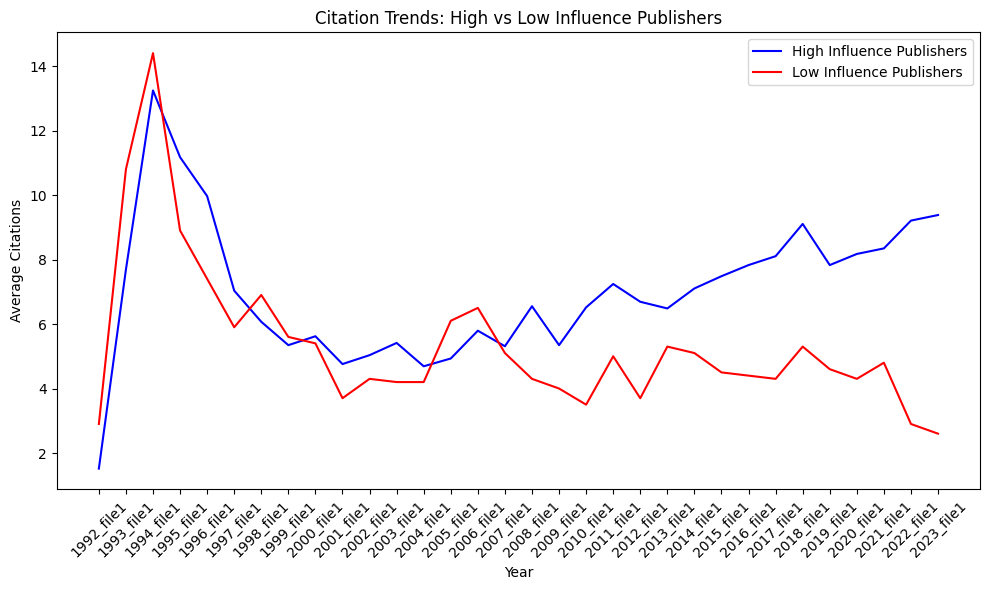

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('updated_merged_papers.csv')

# Convert the year-based citation columns into a list
years = [str(year) + '_file1' for year in range(1992, 2024)]

# Add a column to indicate if a publisher is high-influential
df['Publisher Influence'] = df['Publisher Influence'].apply(lambda x: x.strip().lower() if isinstance(x, str) else '')
df['High Influence'] = df['Publisher Influence'].apply(lambda x: 1 if x == 'high' else 0)

# Now, group by 'High Influence' and calculate average citation count per year for each group
df_high = df[df['High Influence'] == 1]
df_low = df[df['High Influence'] == 0]

# Calculate average citation count over time for high and low influence publishers
avg_high_influence = df_high[years].mean()
avg_low_influence = df_low[years].mean()

# Plot the citation trends
plt.figure(figsize=(10,6))
plt.plot(years, avg_high_influence, label='High Influence Publishers', color='blue')
plt.plot(years, avg_low_influence, label='Low Influence Publishers', color='red')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Citations')
plt.title('Citation Trends: High vs Low Influence Publishers')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


TOPIC'S IMPACT IN A PAPER'S ENDURANCE

In [ ]:
import pandas as pd
from google.colab import files


uploaded = files.upload()
# Load your data
df = pd.read_csv("updated_merged_papers.csv")

# Group by Topic and Status to count occurrences
topic_status_counts = df.groupby(["Topic", "Status_file1"]).size().unstack(fill_value=0)

# Optional: add a column for total papers per topic
topic_status_counts["Total"] = topic_status_counts.sum(axis=1)

# Optional: add percentage enduring
topic_status_counts["% Enduring"] = (topic_status_counts.get("Enduring", 0) / topic_status_counts["Total"]) * 100

# Sort by percentage of enduring papers
topic_status_counts = topic_status_counts.sort_values(by="% Enduring", ascending=False)

# Display results
print(topic_status_counts)


Saving updated_merged_papers.csv to updated_merged_papers.csv
Status_file1                                        Enduring  Forgotten  \
Topic                                                                     
Topic 3: point, higgs, connected, quasitriangul...         3          0   
Topic 7: physic, modular, meromorphic, combinat...         2          0   
Topic 4: dimension, open, ghost, gauged, spinors           4          1   
Topic 2: derivative, vertex, operator, modulus,...         3          1   
Topic 1: potential, phase, motion, find, liouville         5          2   
Topic 0: gribov, ambiguity, topological, lead, ...         1          1   
Topic 5: coupling, virasoro, realisation, sigma...         4          4   
Topic 8: spin, potential, around, related, temp...         2          3   
Topic 9: analogy, polynomial, matrix, hole, black          1          2   

Status_file1                                        Total  % Enduring  
Topic                                   

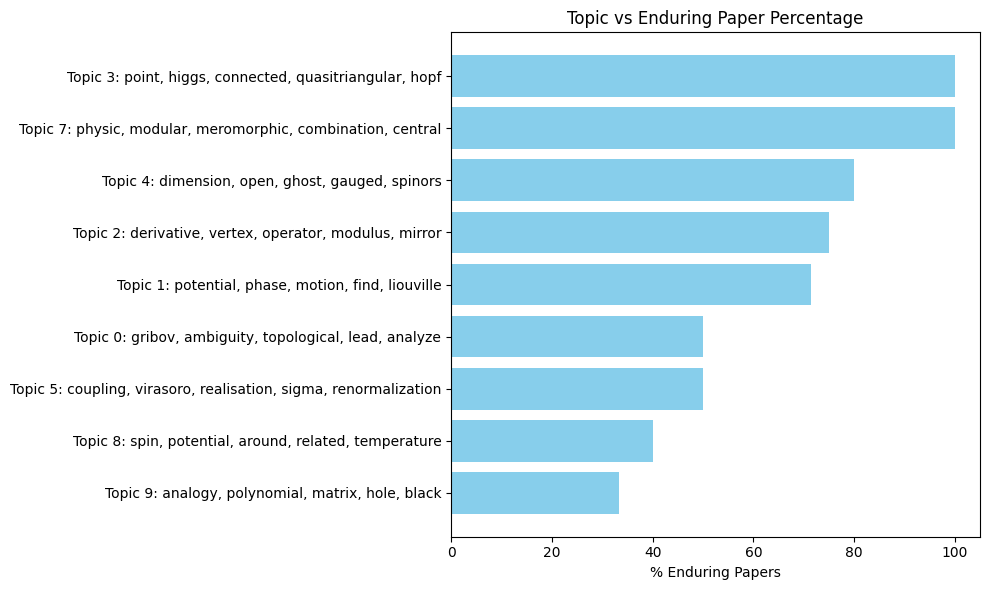

In [ ]:
import matplotlib.pyplot as plt

# Sort by endurance percentage
top_topics = topic_status_counts.sort_values(by='% Enduring', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_topics.index, top_topics['% Enduring'], color='skyblue')
plt.xlabel('% Enduring Papers')
plt.title('Topic vs Enduring Paper Percentage')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


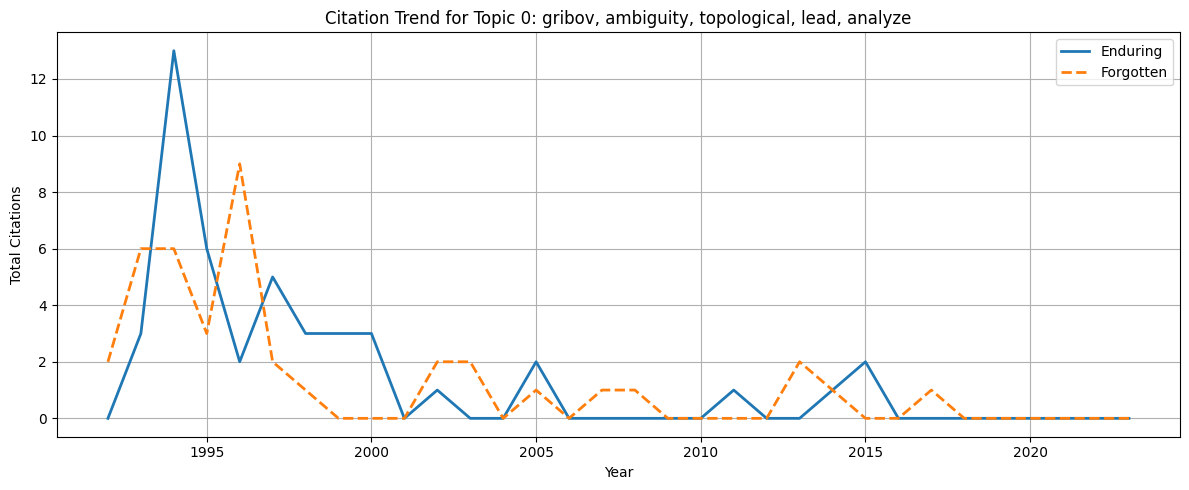

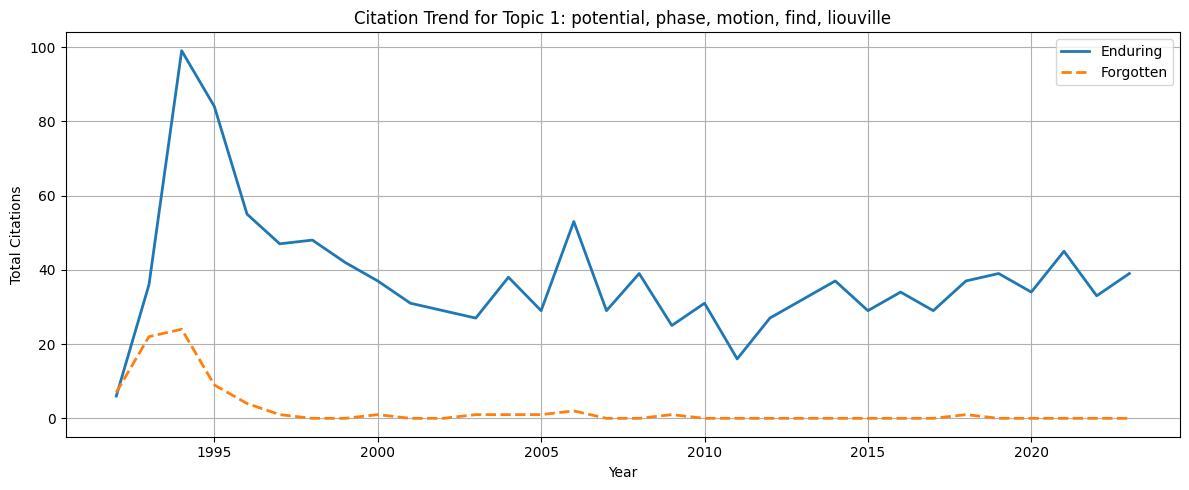

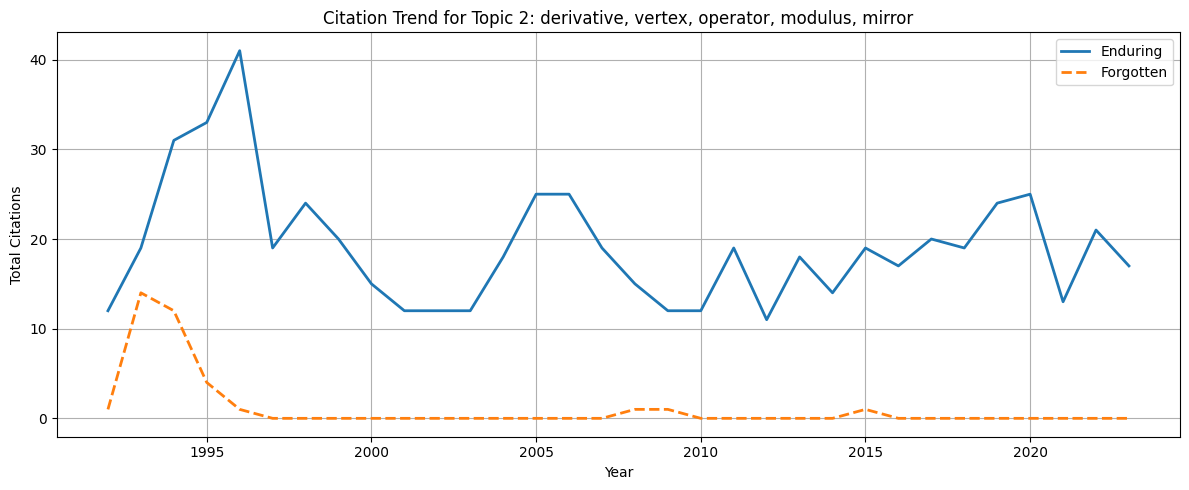

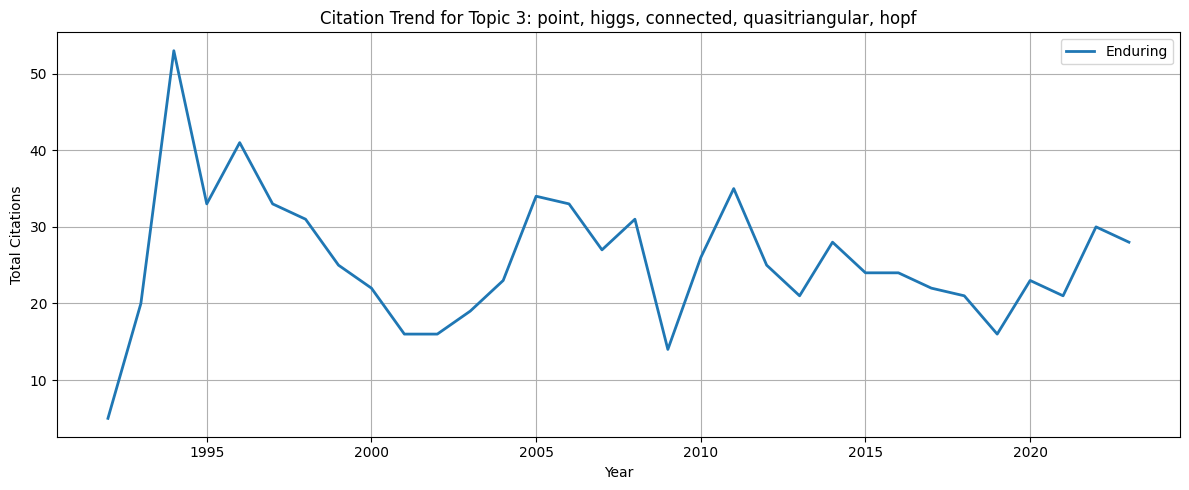

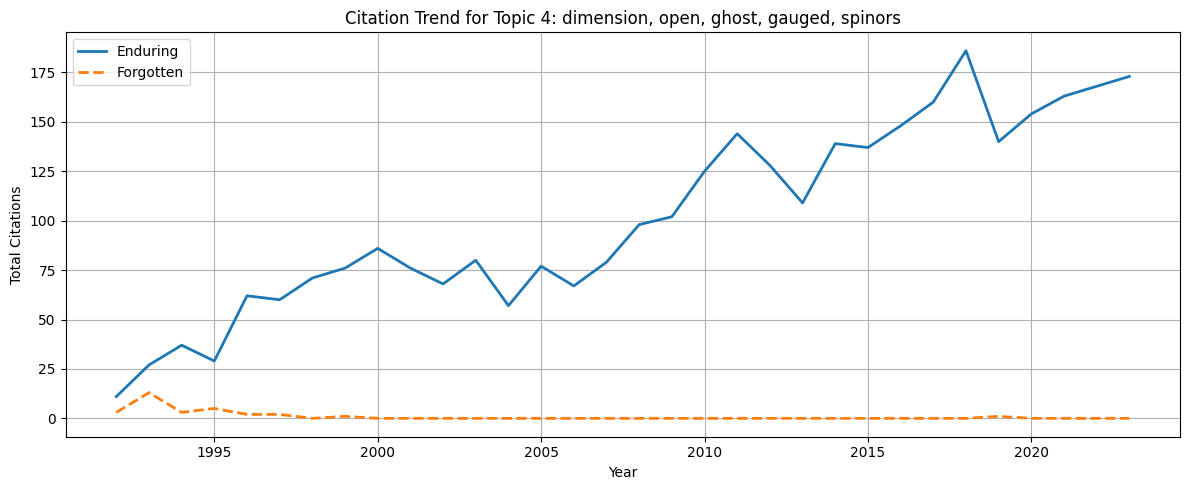

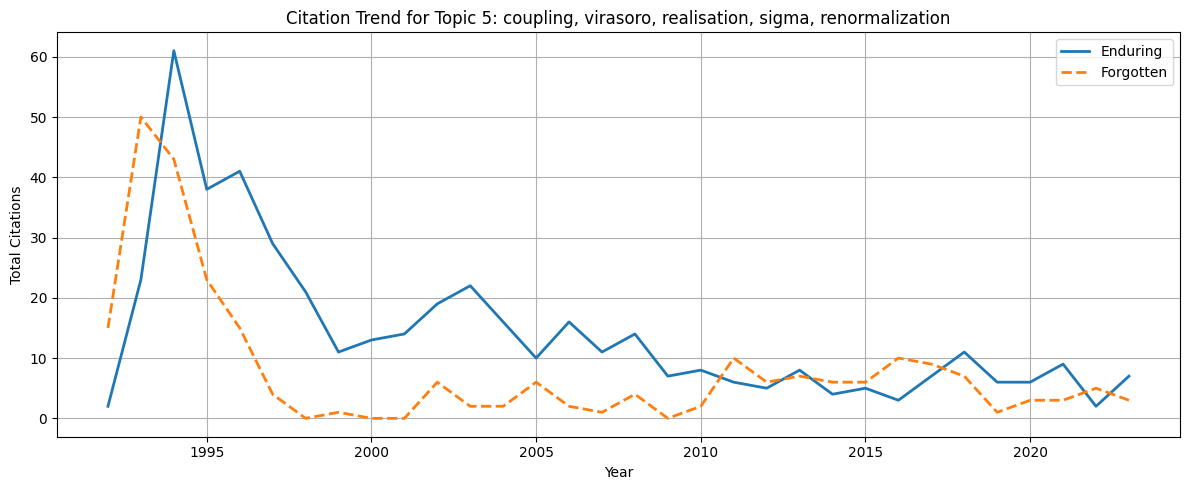

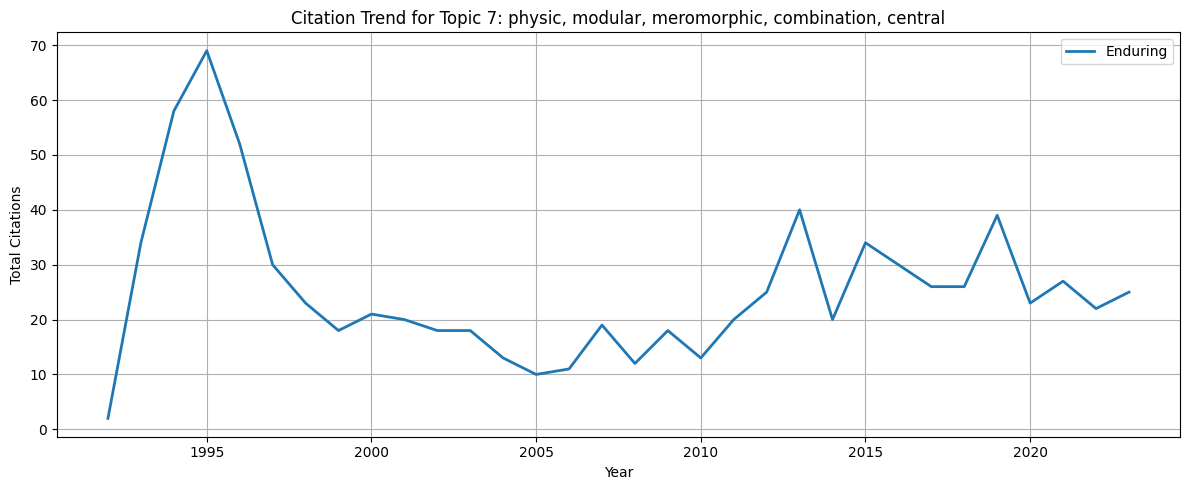

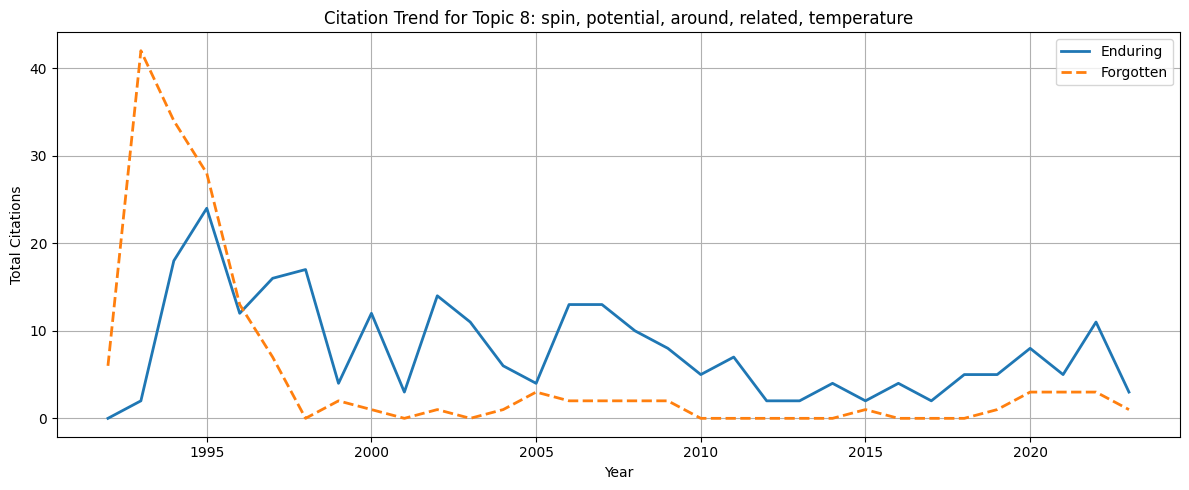

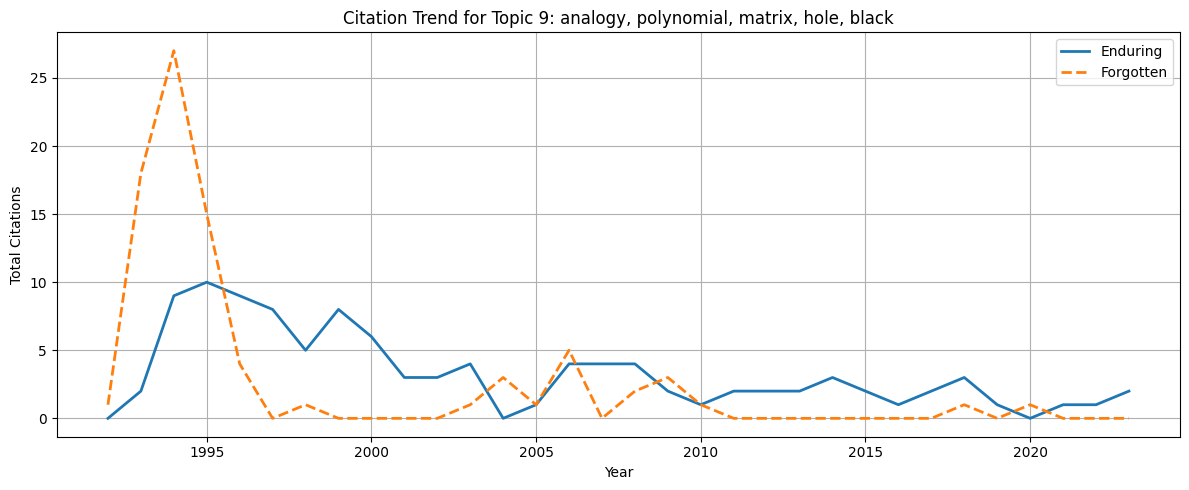

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("updated_merged_papers.csv")

# Step 1: Select year columns
years = [f"{year}_file1" for year in range(1992, 2024)]

# Step 2: Group by Topic and Status, then sum yearwise citations
citation_trends = df.groupby(["Topic", "Status_file1"])[years].sum()

# Step 3: Plot citation trends
topics_to_plot = citation_trends.index.get_level_values(0).unique()

for topic in topics_to_plot:
    topic_data = citation_trends.loc[topic]

    plt.figure(figsize=(12, 5))

    if "Enduring" in topic_data.index:
        plt.plot(range(1992, 2024), topic_data.loc["Enduring"], label="Enduring", linewidth=2)

    if "Forgotten" in topic_data.index:
        plt.plot(range(1992, 2024), topic_data.loc["Forgotten"], label="Forgotten", linestyle='--', linewidth=2)

    plt.title(f"Citation Trend for {topic}")
    plt.xlabel("Year")
    plt.ylabel("Total Citations")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


FORGOTTEN/DECLINING TOPICS ONLY SURVIVED THANKS TO HIGH INFLUENTIAL PUBISHERS (eg topic 0,9,8), WHILE TOPICS LIKE 4,3 SURVIVE EVEN WITH LOW INFLUENTIAL PUBLISHERS

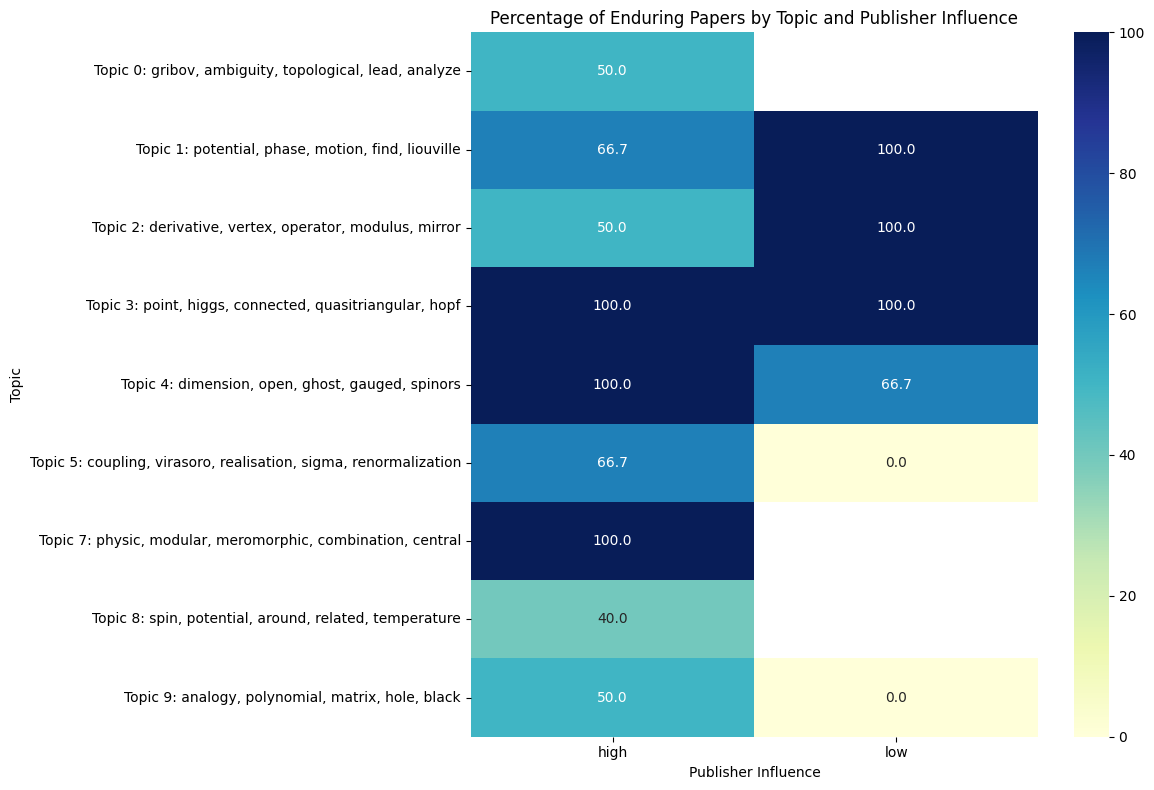

In [ ]:
import seaborn as sns

# Pivot the grouped data to create a heatmap
heatmap_data = sorted_grouped.reset_index().pivot(
    index='Topic',
    columns='Publisher Influence',
    values='% Enduring'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Percentage of Enduring Papers by Topic and Publisher Influence')
plt.ylabel('Topic')
plt.xlabel('Publisher Influence')
plt.tight_layout()
plt.show()


ACCESS' IMPACT ON A PAPER'S ENDURANCE (not very promising since almost all papers were restricted)

Saving latest_merged_ds.csv to latest_merged_ds.csv
Top 10 Topic + Publisher Influence + Access combinations by % Enduring:
Status_file1                                                                       Enduring  \
Topic                                              Publisher Influence Access                 
Topic 1: potential, phase, motion, find, liouville low                 Free               1   
Topic 3: point, higgs, connected, quasitriangul... high                Restricted         2   
Topic 2: derivative, vertex, operator, modulus,... low                 Restricted         1   
                                                                       Free               1   
Topic 3: point, higgs, connected, quasitriangul... low                 Unknown            1   
Topic 4: dimension, open, ghost, gauged, spinors   high                Restricted         2   
Topic 7: physic, modular, meromorphic, combinat... high                Restricted         2   
Topic 1: potential, p

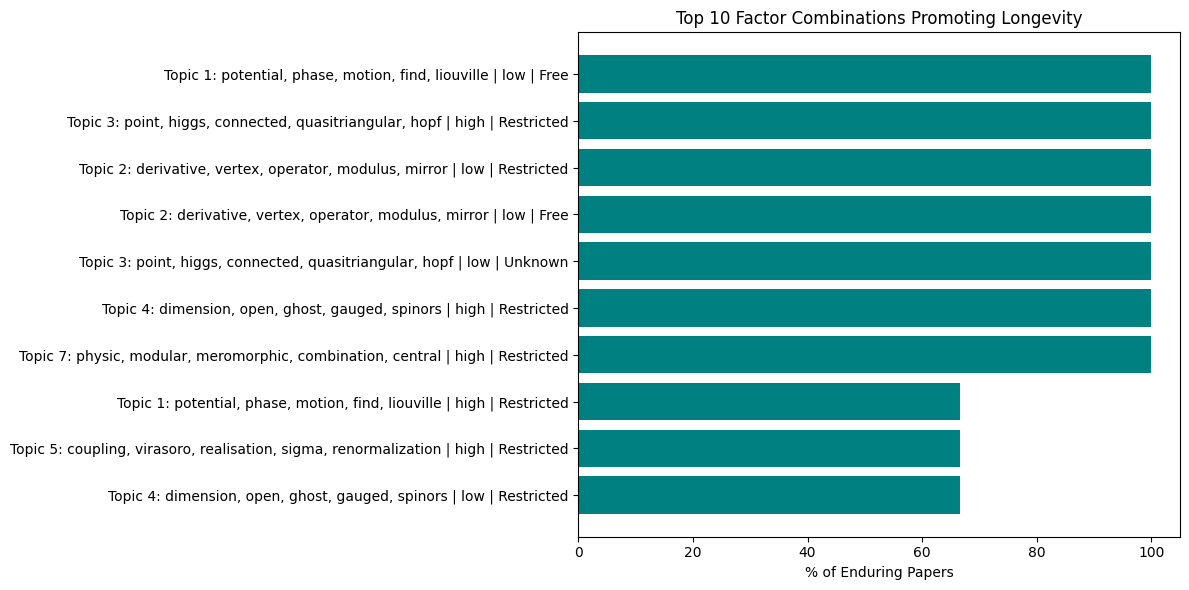

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the dataset
uploaded = files.upload()
df = pd.read_csv('latest_merged_ds.csv')

# Step 2: Clean Publisher Influence column
df['Publisher Influence'] = df['Publisher Influence'].apply(lambda x: x.strip().lower() if isinstance(x, str) else 'low')
df['Publisher Influence'] = df['Publisher Influence'].replace({'': 'low'})

# Step 3: Handle missing Status values
df['Status_file1'] = df['Status_file1'].fillna('Unknown')

# Step 4: Clean Access column
df['Access'] = df['Access'].fillna('Unknown')
df['Access'] = df['Access'].apply(lambda x: x.strip().capitalize() if isinstance(x, str) else 'Unknown')

# Step 5: Group by Topic, Publisher Influence, Access and Status
grouped = df.groupby(['Topic', 'Publisher Influence', 'Access', 'Status_file1']).size().unstack(fill_value=0)

# Step 6: Add total and % enduring
grouped['Total'] = grouped.sum(axis=1)
grouped['% Enduring'] = (grouped.get('Enduring', 0) / grouped['Total']) * 100

# Step 7: Sort by % enduring
sorted_grouped = grouped.sort_values(by='% Enduring', ascending=False)

# Step 8: Display top 10 combinations
print("Top 10 Topic + Publisher Influence + Access combinations by % Enduring:")
print(sorted_grouped.head(10))

# Step 9: Visualize
top_combos = sorted_grouped.reset_index().head(10)
labels = top_combos.apply(lambda row: f"{row['Topic']} | {row['Publisher Influence']} | {row['Access']}", axis=1)

plt.figure(figsize=(12,6))
plt.barh(labels, top_combos['% Enduring'], color='teal')
plt.xlabel('% of Enduring Papers')
plt.title('Top 10 Factor Combinations Promoting Longevity')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


SENTIMENT ANALYSIS TO SEE IF PAPERS WERE DEBUNKED OR SUPPORTED AND BUILT UPON

In [ ]:
# Install necessary packages
!pip install transformers pandas torch openpyxl

# Imports
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Load Excel file
df = pd.read_excel("paper1 (3).xlsx")
df = df.dropna(subset=["Abstract"])

# Insert original abstract here
original_abstract = """In the usual matrix-model approach to random discretized two-dimensional manifolds, one introduces n Ising spins on each cell, i.e., a discrete version of 2D quantum gravity coupled to matter with a central charge 12n. The matrix model consists then of an integral over 2n matrices, which we are unable to solve for n>1. However, for a fixed genus we can expand in the cosmological constant g for arbitrary values of n, and a simple minded analysis of the series yields for n = 0, 1 and 2 the expected results for the exponent γstring with an amazing precision given the small number of terms that we considered. We then proceed to larger values of n. Simple tests of universality are successfully applied; for instance, we obtain the same exponents for n = 3 or for the one-Ising model coupled to a one-dimensional target space. The calculations are easily extended to q-states Potts models, through an integration over qn matrices. We see no sign of the tachyonic instability of the theory, but we have only considered genus zero at this stage."""


# Load NLI model
model_name = "ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Label map
label_map = {0: "contradiction", 1: "neutral", 2: "entailment"}
final_label_map = {
    "entailment": "Builds Upon",
    "contradiction": "Debunks",
    "neutral": "Unclear"
}

# Function to classify stance using NLI
def classify_stance_nli(abstract):
    encoded = tokenizer.encode_plus(original_abstract, abstract, return_tensors="pt", truncation=True)
    with torch.no_grad():
        outputs = model(**encoded)
    label_id = torch.argmax(outputs.logits).item()
    return final_label_map[label_map[label_id]]

# Apply to dataset
df["Label"] = df["Abstract"].apply(classify_stance_nli)

# Show full result
pd.set_option('display.max_rows', None)
print(df[["Title", "Label"]])


Some weights of the model checkpoint at ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                                                Title    Label
0   A naive matrix-model approach to two-dimension...  Debunks
1     Renormalization group approach to matrix models  Debunks
2   Tightness of supercritical Liouville first pas...  Unclear
3   Weak Liouville quantum gravity metrics with ma...  Unclear
4      Simplicial quantum gravity and random lattices  Unclear
5   Supercritical Liouville quantum gravity and CLE_4  Unclear
6   Liouville Quantum Gravity with Matter Central ...  Unclear
7   Brownian loops and the central charge of a Lio...  Debunks
8                 A proposal for strings at D > 62; 1  Unclear
9   MATRIX MODEL PERTURBED BY HIGHER ORDER CURVATU...  Debunks
10  Area measures and branched polymers in supercr...  Debunks
11     Matter fields with c > 1 coupled to 2d gravity  Unclear
12  Renormalization group flow in one- and two-mat...  Unclear
13               Baby universes in 2d quantum gravity  Unclear
14  A scenario for the c > 1 barrier in non-critic...  